# Behavioural analysis

## Preparing the data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [15]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

In [16]:
def detectRevs(thisDat):
    theseResps = np.array(thisDat.data)
    #print theseResps
    revInds = np.where(theseResps[:-1] != theseResps[1:])[0]
    #print revInds
    theseIntns = np.array(thisDat.intensities)
    #print theseIntns
    revIntns = theseIntns[revInds]
    #print revIntns
    return revIntns
def computeRevMeans(revIntns,nRevs):
    #print revIntns
    revLen = np.shape(revIntns)[0]
    #print revLen
    if revLen >= nRevs:
        return np.average(revIntns[-nRevs])
    else:
        return np.NAN

In [17]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        print subjStairLabel #thisSubjStair['label']
        thisDat = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisDat.intensities)
        resps.append(thisDat.data)
        theseRevIntns = detectRevs(thisDat)
        revMeans.append([computeRevMeans(theseRevIntns,4), 
                         computeRevMeans(theseRevIntns,6), 
                         computeRevMeans(theseRevIntns,8)])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'sessionLabel': os.path.basename(subjStairsPath),
                    'stairLabel': [subjStairLabel]
                }))
        #print np.round(thisDat.intensities,2)
        #print thisDat.data # responses (correct/incorrect)
        #print thisDat.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_p0_s1_2017-01-25_1539
st-3_mcBv4.8_targTpeak1.5
st-3_mcBv0.01_targTpeak1.0
st-3_mcBv4.8_targTpeak0.5
st0_mcBv0.01_targTpeak1.0
st-3_mcBv4.8_targTpeak1.0
st0_mcBv4.8_targTpeak0.5
st0_mcBv4.8_targTpeak1.5
st0_mcBv4.8_targTpeak1.0
st0_mcBv0.01_targTpeak1.5
st0_mcBv0.01_targTpeak0.5
st-3_mcBv0.01_targTpeak0.5
st-3_mcBv0.01_targTpeak1.5


In [18]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(12, 27)
Index([u'expName', u'time', u'participant', u'session', u'nRevs', u'mcSz',
       u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz',
       u'targSf', u'targOri1', u'targOri2', u'targXoff1', u'targXoff2',
       u'targYoff', u'targV', u'targTtot', u'targTpeak', u'trialT',
       u'fixCross', u'stairLabel', u'stairStart', u'stairMean', u'condLabel'],
      dtype='object')


,expName,time,participant,session,nRevs,mcSz,mcSf,mcBv,mcBsf,mcPeriGap,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,stairMean,condLabel
0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,0.1,4.80,0.05,112,...,0,0,1,1.5,2,1,st-3_mcBv4.8_targTpeak1.5,-3,NaN,mcBv-4.8_tgT-1.5
1,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,0.1,0.01,0.05,112,...,0,0,1,1.0,2,1,st-3_mcBv0.01_targTpeak1.0,-3,NaN,mcBv-0.01_tgT-1.0
2,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,0.1,4.80,0.05,112,...,0,0,1,0.5,2,1,st-3_mcBv4.8_targTpeak0.5,-3,NaN,mcBv-4.8_tgT-0.5
3,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,0.1,0.01,0.05,112,...,0,0,1,1.0,2,1,st0_mcBv0.01_targTpeak1.0,0,NaN,mcBv-0.01_tgT-1.0
4,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,0.1,4.80,0.05,112,...,0,0,1,1.0,2,1,st-3_mcBv4.8_targTpeak1.0,-3,NaN,mcBv-4.8_tgT-1.0


In [19]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(12,)
(12,)
(12, 3)
(12, 2)


,sessionLabel,stairLabel
0,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5
1,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv0.01_targTpeak1.0
2,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak0.5
3,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st0_mcBv0.01_targTpeak1.0
4,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.0


Combining the trial data into a tall df.

In [71]:
nStairs = np.shape(resps)[0]
nTrials = []
for thisResp in resps: nTrials.append(np.shape(thisResp)[0])
nTrialsMax = np.max(nTrials)
allResps, allIntns = [], []
for i in range(nStairs):
    thisResp, thisIntn = resps[i], intns[i]
    x, y = np.empty((nTrialsMax,)), np.empty((nTrialsMax,))
    x[:], y[:] = np.NAN, np.NAN
    x[0:nTrials[i]] = np.array(thisResp)
    y[0:nTrials[i]] = np.array(thisIntn)
    allResps.append(x)
    allIntns.append(y)
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrialsMax)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrialsMax,nTrialsMax),nStairs)
orderInfoRepd['intns'] = np.array(allIntns).flatten()
orderInfoRepd['resps'] = np.array(allResps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on='stairLabel')
trials.head(5)

(492, 2)


,sessionLabel,stairLabel,trialN,intns,resps,expName,time,participant,session,nRevs,...,targXoff2,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairStart,stairMean,condLabel
0,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5,1.0,-3.0,0.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.5,2,1,-3,NaN,mcBv-4.8_tgT-1.5
1,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5,2.0,-2.0,0.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.5,2,1,-3,NaN,mcBv-4.8_tgT-1.5
2,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5,3.0,-1.0,1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.5,2,1,-3,NaN,mcBv-4.8_tgT-1.5
3,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5,4.0,-2.0,1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.5,2,1,-3,NaN,mcBv-4.8_tgT-1.5
4,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5,5.0,-2.0,1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.5,2,1,-3,NaN,mcBv-4.8_tgT-1.5


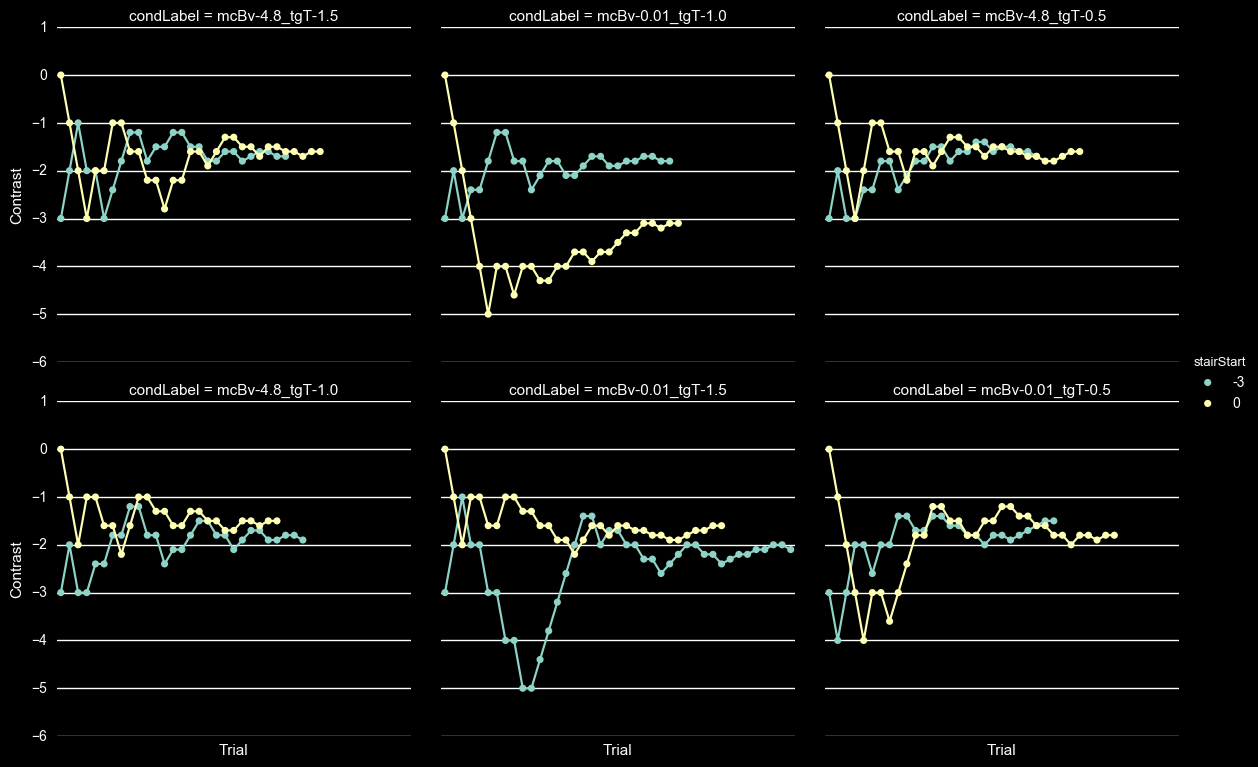

In [75]:
g = sns.factorplot(x='trialN', y='intns', hue='stairStart', col='condLabel', data=trials, 
               col_wrap=3, ci=None, scale=.5)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

In [76]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on='stairLabel')
stairsWithRevs.head(5)

(12, 3)


,meanRevs4,meanRevs6,meanRevs8,sessionLabel,stairLabel,expName,time,participant,session,nRevs,...,targXoff2,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairStart,stairMean,condLabel
0,-1.8,-1.5,-1.8,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.5,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.5,2,1,-3,NaN,mcBv-4.8_tgT-1.5
1,-1.9,-1.9,-2.1,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv0.01_targTpeak1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.0,2,1,-3,NaN,mcBv-0.01_tgT-1.0
2,-1.6,-1.8,-1.8,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak0.5,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,0.5,2,1,-3,NaN,mcBv-4.8_tgT-0.5
3,-3.3,-3.7,-3.7,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st0_mcBv0.01_targTpeak1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.0,2,1,0,NaN,mcBv-0.01_tgT-1.0
4,-1.9,-1.8,-2.4,mc2_tgT-mcBv_p0_s1_2017-01-25_1539.csv,st-3_mcBv4.8_targTpeak1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,...,48,0,0,1,1.0,2,1,-3,NaN,mcBv-4.8_tgT-1.0


In [77]:
condRevMeans = stairsWithRevs.groupby('condLabel')['meanRevs4','meanRevs6','meanRevs8'].mean()
condRevMeans['condLabel'] = condRevMeans.index
condRevMeans = condRevMeans.reset_index(drop=True)
condRevMeans.head(6)

,meanRevs4,meanRevs6,meanRevs8,condLabel
0,-1.80,-1.60,-1.90,mcBv-0.01_tgT-0.5
1,-2.60,-2.80,-2.90,mcBv-0.01_tgT-1.0
2,-2.05,-1.95,-2.05,mcBv-0.01_tgT-1.5
3,-1.55,-1.70,-1.70,mcBv-4.8_tgT-0.5
4,-1.80,-1.70,-2.00,mcBv-4.8_tgT-1.0
5,-1.65,-1.55,-2.00,mcBv-4.8_tgT-1.5


In [78]:
stairsClean = stairs.drop(['stairStart','stairMean','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevMeans, stairsClean, how='inner', on='condLabel')
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'condLabel', u'expName',
       u'time', u'participant', u'session', u'nRevs', u'mcSz', u'mcSf',
       u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz', u'targSf',
       u'targOri1', u'targOri2', u'targXoff1', u'targXoff2', u'targYoff',
       u'targV', u'targTtot', u'targTpeak', u'trialT', u'fixCross'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,condLabel,expName,time,participant,session,nRevs,mcSz,...,targOri1,targOri2,targXoff1,targXoff2,targYoff,targV,targTtot,targTpeak,trialT,fixCross
0,-1.80,-1.60,-1.90,mcBv-0.01_tgT-0.5,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,...,0,0,-48,48,0,0,1,0.5,2,1
1,-2.60,-2.80,-2.90,mcBv-0.01_tgT-1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,...,0,0,-48,48,0,0,1,1.0,2,1
2,-2.05,-1.95,-2.05,mcBv-0.01_tgT-1.5,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,...,0,0,-48,48,0,0,1,1.5,2,1
3,-1.55,-1.70,-1.70,mcBv-4.8_tgT-0.5,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,...,0,0,-48,48,0,0,1,0.5,2,1
4,-1.80,-1.70,-2.00,mcBv-4.8_tgT-1.0,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,...,0,0,-48,48,0,0,1,1.0,2,1
5,-1.65,-1.55,-2.00,mcBv-4.8_tgT-1.5,mc2_tgT-mcBv,2017-01-25_1539,0,1,10,256,...,0,0,-48,48,0,0,1,1.5,2,1


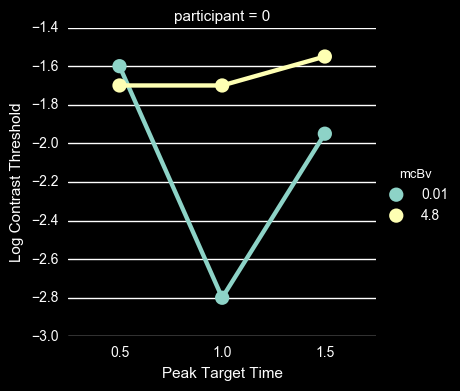

In [79]:
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='mcBv', col='participant', data=conds, 
               ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)

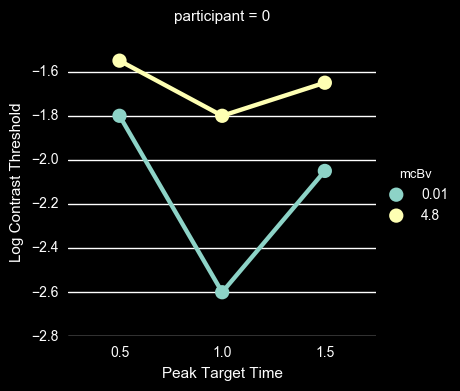

In [80]:
g = sns.factorplot(x='targTpeak', y='meanRevs4', hue='mcBv', col='participant', data=conds, 
               ci=None)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')
#g.set(xticks=[])
#plt.ylim(-0.1,1.1)